In [68]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Opening Zeppelin hourly data from 2010

In [120]:
filenam1 = '/home/2daa7756-2d5725-2d4dfb-2db0ff-2d5e0a6858a009/shared-ns1000k/inputs//Aerosol_sizedist_obs/Zeppelin_2010_hourly.csv'
filenam2 = '/home/2daa7756-2d5725-2d4dfb-2db0ff-2d5e0a6858a009/shared-ns1000k/inputs//Aerosol_sizedist_obs/Zeppelin_2011_hourly.csv'
flist=[filenam1, filenam2]
ldf = []
for f in flist:
    ldf.append(pd.read_csv(f, parse_dates=[['0','0.1','0.2','0.3','0.4']],date_parser = mydateparser)) 
data = pd.concat(ldf, axis=0)


In [114]:
mydateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M")
data = pd.read_csv(filenam, parse_dates=[['0','0.1','0.2','0.3','0.4']],date_parser = mydateparser)
#data.head()
#data.info()

In [121]:
data.rename(columns={'0_0.1_0.2_0.3_0.4':'date'}, inplace = True)

In [122]:
data = data.set_index('date')


In [124]:
 #remove last column
 data.drop(labels='0.6', axis=1, inplace=True)   
    

KeyError: "['0.6'] not found in axis"

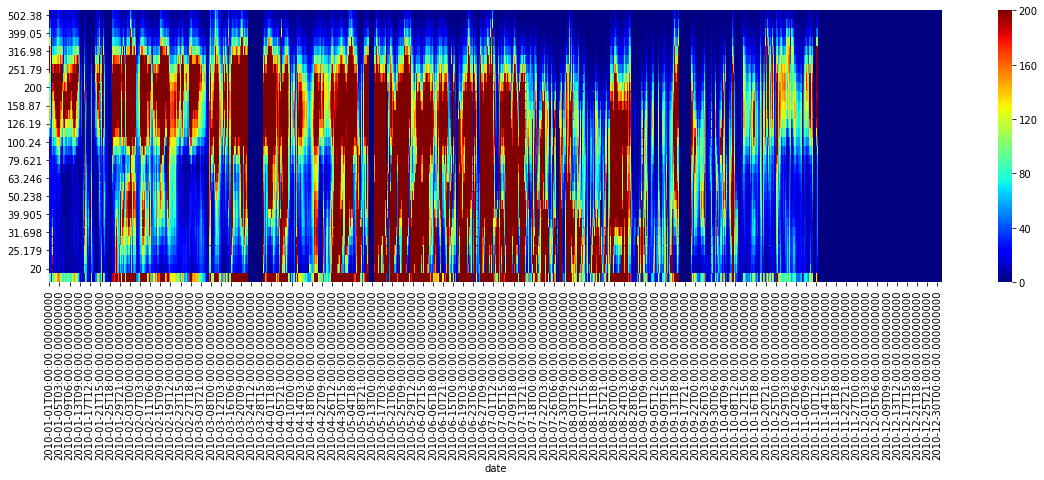

In [73]:
fig = plt.figure(1, figsize=[20,5])

#set projection for plotting

ax = plt.subplot(1,1,1)
sns.heatmap(data.T.iloc[::-1], vmin=0, vmax=200, cmap='jet')


In [18]:
data.iloc[:,1]

date
2010-01-01 00:00:00      9.2141
2010-01-01 01:00:00      7.4015
2010-01-01 02:00:00      8.2293
2010-01-01 03:00:00      6.0217
2010-01-01 04:00:00      9.8351
                         ...   
2010-12-31 19:00:00   -999.0000
2010-12-31 20:00:00   -999.0000
2010-12-31 21:00:00   -999.0000
2010-12-31 22:00:00   -999.0000
2010-12-31 23:00:00     15.7530
Name: 20, Length: 8760, dtype: float64

In [125]:
#Vaihdetaan oikeesta datasta kaikki -999 arvot NaN
data = data.replace(-999,np.nan)

In [126]:
data

,0.5,20,22.44,25.179,28.251,31.698,35.566,39.905,44.774,50.238,...,178.25,200,224.4,251.79,282.51,316.98,355.66,399.05,447.74,502.38
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,127.010,9.2141,13.3240,18.261,23.245,30.351,39.4690,47.835,47.8340,42.7440,...,112.370,115.400,168.740,298.220,358.390,247.520,125.5700,54.1360,22.3210,9.6607
2010-01-01 01:00:00,110.150,7.4015,12.8350,18.326,23.133,26.412,31.9880,38.002,38.1110,38.6730,...,107.270,101.910,140.920,244.340,294.450,218.560,115.0300,49.6960,20.9440,9.4524
2010-01-01 02:00:00,98.864,8.2293,10.1860,14.526,19.346,23.288,30.8280,32.256,33.3850,34.3440,...,90.091,88.761,121.910,207.210,267.870,196.080,101.8700,45.4790,20.8550,9.9242
2010-01-01 03:00:00,103.960,6.0217,10.0140,14.795,21.470,26.444,28.6210,31.333,31.4070,35.1930,...,99.499,93.949,133.170,231.840,290.350,209.660,110.8000,50.5580,23.2000,11.1620
2010-01-01 04:00:00,109.060,9.8351,12.5260,15.748,19.991,24.453,30.3280,33.429,36.5330,36.4650,...,102.890,106.060,142.540,243.290,307.780,215.960,115.7900,54.9650,24.6220,12.0210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-31 19:00:00,33.237,4.5237,8.2171,12.178,13.667,15.023,15.4340,10.998,9.2830,8.3625,...,66.587,74.784,73.260,58.339,35.515,19.784,12.6390,5.4085,3.2198,4.0654
2011-12-31 20:00:00,36.031,7.5069,11.4000,15.513,16.042,16.272,15.7030,12.395,11.8270,12.5400,...,65.547,67.752,62.612,48.068,31.817,18.368,8.8337,7.7784,6.9098,5.9238
2011-12-31 21:00:00,38.550,4.4545,9.5881,15.145,18.117,17.796,13.6140,11.582,9.2801,8.4581,...,81.728,91.344,84.708,53.480,37.032,22.753,10.9250,9.4918,7.4926,5.1997


In [82]:
#valitaan datasta pelkästään tietyt kolumnit (20-50nm) ja summataan ne yhteen
small_particle_data = data.iloc[:,1:9].sum(axis=1)


In [127]:
# take the mean for every row for indexes between 1-9 so (20-50 nm)
small_particle_data_mean = data.iloc[:,1:9].mean(axis=1)


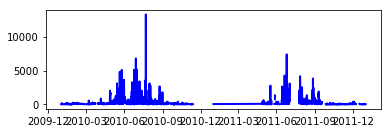

In [128]:
#plot the data
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(small_particle_data_mean, color='blue', lw=2)

# change the y-axes to log
#ax.set_yscale('log')

In [99]:
small_particle_data_mean

date
2010-01-01 00:00:00    28.691637
2010-01-01 01:00:00    24.526063
2010-01-01 02:00:00    21.505537
2010-01-01 03:00:00    21.263212
2010-01-01 04:00:00    22.855387
                         ...    
2010-12-31 19:00:00          NaN
2010-12-31 20:00:00          NaN
2010-12-31 21:00:00          NaN
2010-12-31 22:00:00          NaN
2010-12-31 23:00:00    33.761125
Length: 8760, dtype: float64

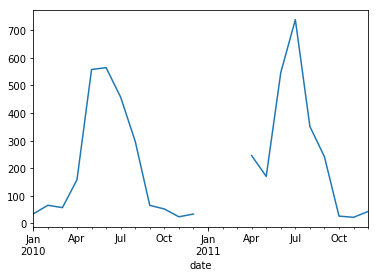

In [129]:
# lets take mean for every month and plot them together
small_particle_data_mean.resample('M').mean().plot()

In [133]:
_se = small_particle_data_mean.resample('M').mean()

In [171]:
Y = 'y'
M = 'm'
var = 'spdm'


In [202]:
_df = pd.DataFrame(_se,columns=[var])
_df[M] = _df.index.month
_df[Y] = _df.index.year

_df= _df.set_index(M)

NameError: name 'var' is not defined

y
2010    [AxesSubplot(0.125,0.2;0.775x0.68)]
2011    [AxesSubplot(0.125,0.2;0.775x0.68)]
dtype: object

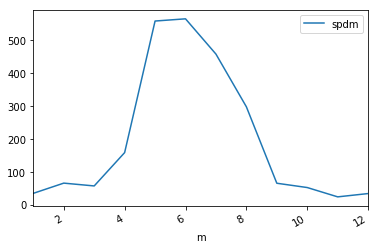

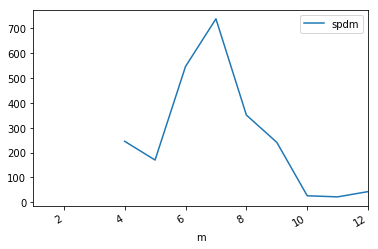

In [180]:
_df.groupby('y').plot(y='spdm',subplots=True)

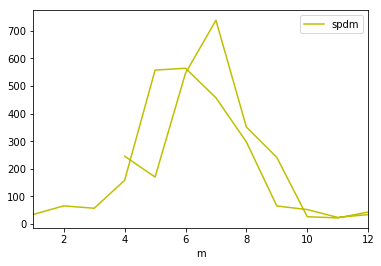

In [174]:
_df.plot(y='spdm',color='y')

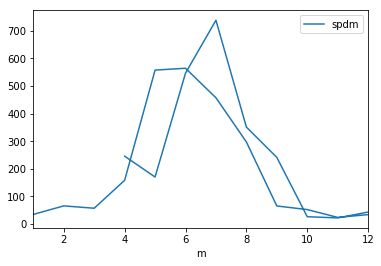

In [155]:
_df.plot(y='spdm',x='m')

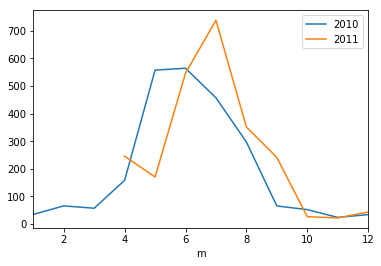

In [164]:
ax = plt.axes()
_df[_df['y']==2010].plot(x='m',y='spdm',ax=ax, label ='2010' )
_df[_df['y']==2011].plot(x='m',y='spdm',ax=ax, label ='2011')

In [194]:
_df.reset_index()

,m,spdm,y
0,1,34.447331,2010
1,2,65.437523,2010
2,3,56.889464,2010
3,4,158.139479,2010
4,5,557.717221,2010
5,6,564.419334,2010
6,7,457.328173,2010
7,8,297.233322,2010
8,9,65.094502,2010
9,10,52.024606,2010


In [183]:
_df1 = _df.reset_index()

In [196]:
_df2=_df1.set_index(['m','y']).unstack('y')

MultiIndex([('spdm', 2010),
            ('spdm', 2011)],
           names=[None, 'y'])

y
2010    [AxesSubplot(0.125,0.2;0.775x0.68)]
2011    [AxesSubplot(0.125,0.2;0.775x0.68)]
dtype: object

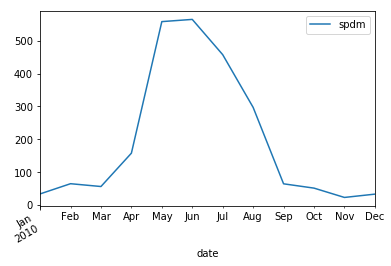

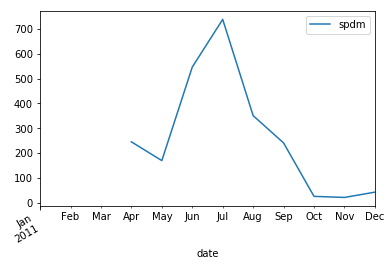

In [150]:
_gr.plot(y='spdm',subplots=True)